In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combine_data = pd.merge(ride_data, city_data, on = 'city', how = 'outer')

# Display the data table for preview
combine_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

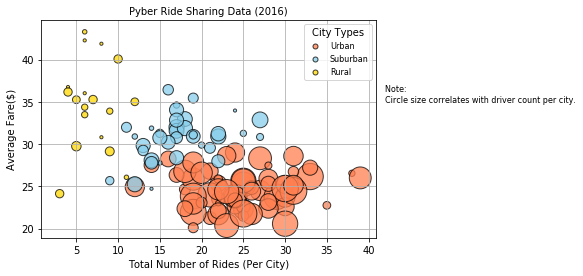

In [27]:
# dataframes for each city type
urban_c = combine_data[(combine_data["type"] == "Urban")].groupby([combine_data["city"]])
suburban_c = combine_data[(combine_data["type"] == "Suburban")].groupby([combine_data["city"]])
rural_c = combine_data[(combine_data["type"] == "Rural")].groupby([combine_data["city"]])

#creating x and y using ride_id, fare and driver_count
urban_id_count = urban_c["ride_id"].count()
suburban_id_count = suburban_c["ride_id"].count()
rural_id_count = rural_c["ride_id"].count()
urban_avg_fare = urban_c["fare"].mean()
suburban_avg_fare = suburban_c["fare"].mean()
rural_avg_fare = rural_c["fare"].mean()
urban_dr_avg = urban_c["driver_count"].mean()
suburban_dr_avg = suburban_c["driver_count"].mean()
rural_dr_avg = rural_c["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_id_count, urban_avg_fare, label = "Urban", s=urban_dr_avg * 10, color=["coral"], \
            edgecolor="black", alpha = 0.75, marker='o')
plt.scatter(suburban_id_count, suburban_avg_fare, label = "Suburban", s=suburban_dr_avg * 10, color=["skyblue"], \
            edgecolor="black", alpha = 0.75, marker='o')
plt.scatter(rural_id_count, rural_avg_fare, label = "Rural", s=rural_dr_avg * 10, color=["gold"], \
            edgecolor="black", alpha = 0.75, marker='o')

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)", fontsize = 10)
plt.ylabel("Average Fare($)", fontsize = 10)
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 10)
plt.grid()

# Create a legend
legend = plt.legend(fontsize = 8, title = "City Types", loc = "best")
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \nCircle size correlates with driver count per city.", fontsize = 8)

# Save Figure
plt.savefig("Images/PyberRideSharing.png")
plt.show()

## Total Fares by City Type

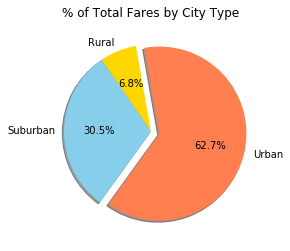

In [38]:
# Calculate Type Percents
type_grouped = combine_data.groupby(['type'])
fare_sum = type_grouped['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, \
       startangle=100)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/PyberTotalFaresbyCity.png")
# Show Figure
plt.show()

## Total Rides by City Type

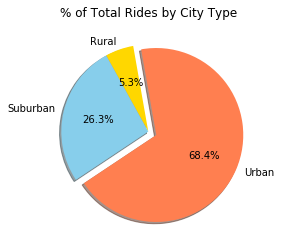

In [44]:
# Calculate Ride Percents
rides_count = type_grouped["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, \
       startangle=100)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/PyberTotalRidesbyCity.png")
# Show Figure
plt.show()

## Total Drivers by City Type

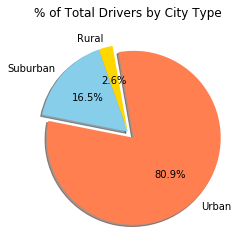

In [48]:
# Calculate Driver Percents
drivers_grouped = city_data.groupby(['type'])
drivers_sum = drivers_grouped['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]

plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, \
       startangle=100)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Images/PyberTotalDriversbyCity.png")
# Show Figure
plt.show()